In [1]:
import os
import time
import uuid
import cv2

In [2]:
images_path = os.path.join('data','images')
num_images = 30

In [3]:
# setting up my video capture device to collect images that will be used for data
cap = cv2.VideoCapture(0)
for imgnum in range(num_images):
    print('collecting image number {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(images_path,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
                           

collecting image number 0
collecting image number 1
collecting image number 2
collecting image number 3
collecting image number 4
collecting image number 5
collecting image number 6
collecting image number 7
collecting image number 8
collecting image number 9
collecting image number 10
collecting image number 11
collecting image number 12
collecting image number 13
collecting image number 14
collecting image number 15
collecting image number 16
collecting image number 17
collecting image number 18
collecting image number 19
collecting image number 20
collecting image number 21
collecting image number 22
collecting image number 23
collecting image number 24
collecting image number 25
collecting image number 26
collecting image number 27
collecting image number 28
collecting image number 29


In [4]:
!labelme

'labelme' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Limiting GPU memory growth to avoid OOM errors by setting GPU 
# memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# images = any file in data\images that ends in .jpg
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [30]:
# converts each element of the dataset into numpy and
# allows me to iterate through them
images.as_numpy_iterator().next()

b'data\\images\\2008_000210.jpg'

In [7]:
# reads the contents of the image file at the file path specified by 'x'
# stores it in 'byte_img' then decodes the contents of the image file
# which are stored as bytes into a tensorflow object that represents that image
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [32]:
# applies the load_image function to each element in images
images = images.map(load_image)

In [33]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

In [ ]:
# creates a figure with 4 subplots
# size of the figure is specified by 'figsize' 
# the variable 'fig' stores a reference to the figure object
# iterates over the elements in the 'plot_images' list
# enumerate adds a counter to the loop which is stored in 'idx'
# each image is displayed in a seperate subplot then displays the entire figure
#uing the show function
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [8]:
import random
import shutil

In [8]:
# Set the path to the data folder
images_path = os.path.join('data','images')

# Set the paths to the train, test, and val folders
train_path = os.path.join('data','train','images')
test_path = os.path.join('data','test','images')
val_path = os.path.join('data','val','images')

# Get a list of all the files in the images folder
image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate the number of image files to put in each folder
num_files_train = int(len(image_files) * 0.7)
num_files_test = int(len(image_files) * 0.15)
num_files_val = len(image_files) - num_files_train - num_files_test

# Split the image files into three lists
files_train = image_files[:num_files_train]
files_test = image_files[num_files_train:num_files_train + num_files_test]
files_val = image_files[num_files_train + num_files_test:]

# Copy the image files to the train, test, and val folders
for file in files_train:
    shutil.copy(os.path.join(images_path, file), train_path)

for file in files_test:
    shutil.copy(os.path.join(images_path, file), test_path)

for file in files_val:
    shutil.copy(os.path.join(images_path, file), val_path)

In [9]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [8]:
import albumentations as alb

In [9]:
# cuts down my images to 450x450
# applies random transformations to the images to give me more data
#specifies bounding box parameters and format
augmentor = alb.Compose([alb.RandomCrop(width=200, height=200),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                label_fields=['class_labels']))

In [10]:
img = cv2.imread(os.path.join('data','train','images','2008_000172.jpg'))

In [11]:
img.shape

(233, 350, 3)

In [12]:
# load bounding box coordinates
with open(os.path.join('data', 'train', 'labels', '2008_000172.json'), 'r') as f:
    label = json.load(f)

In [13]:
label['shapes'][0]['points']

[[0.5502392344497622, 0.23923444976076558],
 [183.32535885167465, 184.68899521531102]]

In [14]:
# stores the coordinates of the bounding box/ label
coords = [    label['shapes'][0]['points'][0][0],
    label['shapes'][0]['points'][0][1],
    label['shapes'][0]['points'][1][0],
    label['shapes'][0]['points'][1][1]
]

In [16]:
coords

[0.5502392344497622,
 0.23923444976076558,
 183.32535885167465,
 184.68899521531102]

In [17]:
coords = list(np.divide(coords, [375,500,375,500]))

In [18]:
coords

[0.0014673046251993658,
 0.00047846889952153117,
 0.48886762360446573,
 0.369377990430622]

In [19]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [20]:
# first 2 values (x_min,y_min)
augmented['bboxes'][0][:2]

(0.47948165869218495, 0.6896746411483253)

In [21]:
# last 2 values (x_max,y_max)
augmented['bboxes'][0][2:]

(1.0, 1.0)

In [22]:
augmented['bboxes']

[(0.47948165869218495, 0.6896746411483253, 1.0, 1.0)]

In [23]:
augmented['image'].shape

(200, 200, 3)

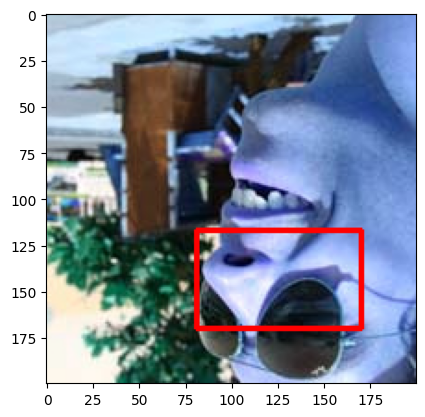

In [24]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [170,170]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [170,170]).astype(int)),
                  (255,0,0), 2)
plt.imshow(augmented['image'])

In [27]:
# checks if a set of coordinate exists for the labels
# peforms data augmentation on my dataset of images and labels
# creates 60 augmented images for every base image
# then saves the augmented data to a new directory 'aug_data'
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords = [    label['shapes'][0]['points'][0][0],
            label['shapes'][0]['points'][0][1],
            label['shapes'][0]['points'][1][0],
            label['shapes'][0]['points'][1][1]
                    ]
            coords = list(np.divide(coords, [500,500,500,500]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

KeyboardInterrupt: 

In [25]:
# compresses the image even more to 120x120
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [26]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [27]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [28]:
train_images.as_numpy_iterator().next()

array([[[0.08382353, 0.14865196, 0.22800244],
        [0.0935049 , 0.15490197, 0.23596814],
        [0.08841912, 0.14724265, 0.22959559],
        ...,
        [0.19234069, 0.26047793, 0.2996936 ],
        [0.18805148, 0.25471812, 0.2939338 ],
        [0.1949755 , 0.2665441 , 0.29840687]],

       [[0.07567402, 0.14056373, 0.22432598],
        [0.10447304, 0.16721813, 0.25741422],
        [0.09883578, 0.16158088, 0.25177696],
        ...,
        [0.21292892, 0.28351715, 0.33057597],
        [0.20042892, 0.2641544 , 0.3146446 ],
        [0.19025736, 0.2579044 , 0.30153185]],

       [[0.09822304, 0.16096814, 0.25116423],
        [0.10686275, 0.16960785, 0.26078433],
        [0.10257353, 0.16531862, 0.26335785],
        ...,
        [0.19754902, 0.26813725, 0.30735293],
        [0.20533088, 0.2759191 , 0.3151348 ],
        [0.19650735, 0.2670956 , 0.30631128]],

       ...,

       [[0.02113971, 0.00036765, 0.        ],
        [0.0283701 , 0.00876226, 0.00508578],
        [0.2357843 , 0

In [29]:
# extracting the class and bounding box for each label
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [30]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2625, 0.2229, 0.5938, 0.673 ], dtype=float16))

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(19380, 19380, 4080, 4080, 4380, 4380)

In [35]:
# shuffles the images in each dataset
# puts the images and labels into bacthes of 8
def prepare_dataset(images, labels):
    dataset = tf.data.Dataset.zip((images, labels))
    dataset = dataset.shuffle(len(images)+500)
    dataset = dataset.batch(8)
    dataset = dataset.prefetch(4)
    return dataset

In [36]:
train = prepare_dataset(train_images, train_labels)
test = prepare_dataset(test_images, test_labels)
val = prepare_dataset(val_images, val_labels)

In [37]:
# shows me the classes and bounding boxes
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.9404, 0.4685, 1.    , 0.9556],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.5376, 0.1127, 1.    , 0.733 ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [38]:
# loops through the samples
data_samples = train.as_numpy_iterator()

In [39]:
# grabs the next batch
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


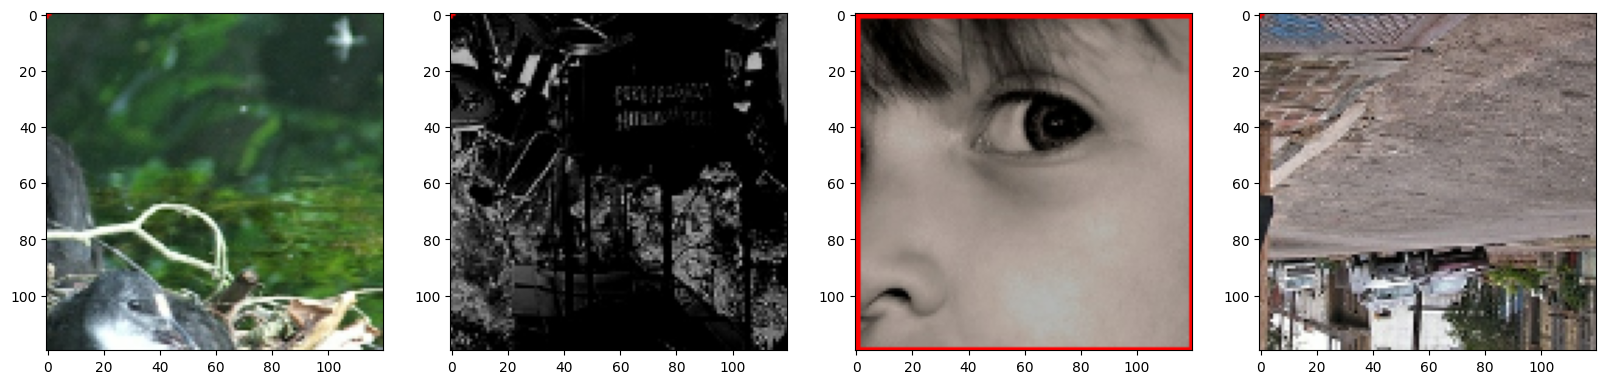

In [40]:
# plotting and viewing the samples
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [42]:
vgg = VGG16(include_top=False)

In [43]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [44]:
# defining my input layer, classification and regression outputs
# final layers get dropped
# input layer gets passed through the vgg16 layer
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    # condenses all of the information from the vgg layer by only returning the max values out of each channel from vgg16's output features
    # identifies the strongest features in the input image like edges corners and patterns so that predictions can be made based on them
    f1 = GlobalMaxPooling2D()(vgg)
    # recieves input from every unit in the previous layer and yeilds 2048 outputs
    class1 = Dense(2048, activation='relu')(f1)
    # recieves inputs from every unit in the previous layer and yeilds 1 output with a value between 0-1
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    # recieves inputs from every unit in the previous layer and yeilds 4 outputs with a value between 0-1 for the bounding box coordinates
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [50]:
facetracker = build_model()

In [51]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_4[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [52]:
# grabs a sample from the training pipline X being images and y being lables
X, y = train.as_numpy_iterator().next()

In [53]:
X.shape

(8, 120, 120, 3)

In [54]:
# passing through my images through the face tracker model and getting classification and coordinate values as outputs
classes, coords = facetracker.predict(X)

1/1 [==============================] - 21s 21s/step


In [55]:
classes, coords

(array([[0.60007226],
        [0.6050956 ],
        [0.53155524],
        [0.59065056],
        [0.5797831 ],
        [0.6443498 ],
        [0.6195274 ],
        [0.5481068 ]], dtype=float32),
 array([[0.5013781 , 0.52307385, 0.34955853, 0.4224026 ],
        [0.4438186 , 0.60888016, 0.3516841 , 0.43943867],
        [0.41759062, 0.61481184, 0.34720618, 0.4796355 ],
        [0.44643354, 0.49641728, 0.28383708, 0.34865984],
        [0.4192553 , 0.6032585 , 0.40058184, 0.46328494],
        [0.5368799 , 0.6808383 , 0.3409831 , 0.46653283],
        [0.49268502, 0.6309597 , 0.31288585, 0.45943105],
        [0.44091114, 0.5254208 , 0.38665748, 0.40089294]], dtype=float32))

In [56]:
# slows down the learning to prevent overfitting the model
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [57]:
# setting up my optimizer which works out how to apply gradients and minimize the loss function
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [58]:
# defining the localization loss function
def localization_loss(y_true, yhat):
    # gets the distance between the actual coordinate and the predicted one
    # I square the difference and reduce the sum
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    # actual height of the box             
    h_true = y_true[:,3] - y_true[:,1] 
    #actual width of the box
    w_true = y_true[:,2] - y_true[:,0] 
    # predicted height of the box
    h_pred = yhat[:,3] - yhat[:,1]
    # predicted width of the box
    w_pred = yhat[:,2] - yhat[:,0] 
    
    # gets the difference between the size of the predicted and actual box
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    # delat_coord + delta_size gives me my localization loss
    return delta_coord + delta_size

In [59]:
# defining the loss function for my classification and regression tasks
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [60]:
# testing localization loss
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.819923>

In [61]:
# testing classification loss
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.89481837>

In [62]:
#testing regression loss which is the same as localization loss
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.819923>

In [63]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [64]:
# creates an instance of my model
model = FaceTracker(facetracker)

In [65]:
model.compile(opt, classloss, regressloss)

In [66]:
# this is where the tensorboard directory logs out to
logdir='logs'

In [67]:
# creates a log directory so I can look back and review my model
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
# call my model and triggers my train step and if i've passed through validation data it will trigger the test step
# allows me to get my training history back
# I'm looking for the numbers to descend smoothly
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
2423/2423 [==============================] - 142s 50ms/step - total_loss: 0.7078 - class_loss: 0.2596 - regress_loss: 0.5780 - val_total_loss: 0.0676 - val_class_loss: 0.0961 - val_regress_loss: 0.0196
Epoch 2/5
2423/2423 [==============================] - 128s 46ms/step - total_loss: 0.3196 - class_loss: 0.1129 - regress_loss: 0.2632 - val_total_loss: 0.0464 - val_class_loss: 0.0035 - val_regress_loss: 0.0446
Epoch 3/5
2423/2423 [==============================] - 129s 47ms/step - total_loss: 0.2222 - class_loss: 0.0779 - regress_loss: 0.1833 - val_total_loss: 0.0027 - val_class_loss: 0.0050 - val_regress_loss: 2.1009e-04
Epoch 4/5
2423/2423 [==============================] - 129s 47ms/step - total_loss: 0.1535 - class_loss: 0.0541 - regress_loss: 0.1264 - val_total_loss: 0.0170 - val_class_loss: 0.0045 - val_regress_loss: 0.0147
Epoch 5/5
2423/2423 [==============================] - 128s 46ms/step - total_loss: 0.1106 - class_loss: 0.0373 - regress_loss: 0.0919 - val_total_l

In [69]:
hist.history

{'total_loss': [0.033999375998973846,
  0.005174679681658745,
  0.04283018782734871,
  0.003443940542638302,
  0.0008991079521365464],
 'class_loss': [0.05440020561218262,
  0.009209437295794487,
  0.013967993669211864,
  0.006142499856650829,
  0.0015890694921836257],
 'regress_loss': [0.006799275055527687,
  0.0005699611501768231,
  0.03584619238972664,
  0.0003726905270013958,
  0.0001045731914928183],
 'val_total_loss': [0.06760407239198685,
  0.04638272896409035,
  0.002729575615376234,
  0.016992423683404922,
  0.0002107573818648234],
 'val_class_loss': [0.09609831124544144,
  0.0035438949707895517,
  0.005038965493440628,
  0.004544599913060665,
  0.0003750421747099608],
 'val_regress_loss': [0.01955491676926613,
  0.044610779732465744,
  0.00021009288320783526,
  0.014720123261213303,
  2.3236299966811202e-05]}

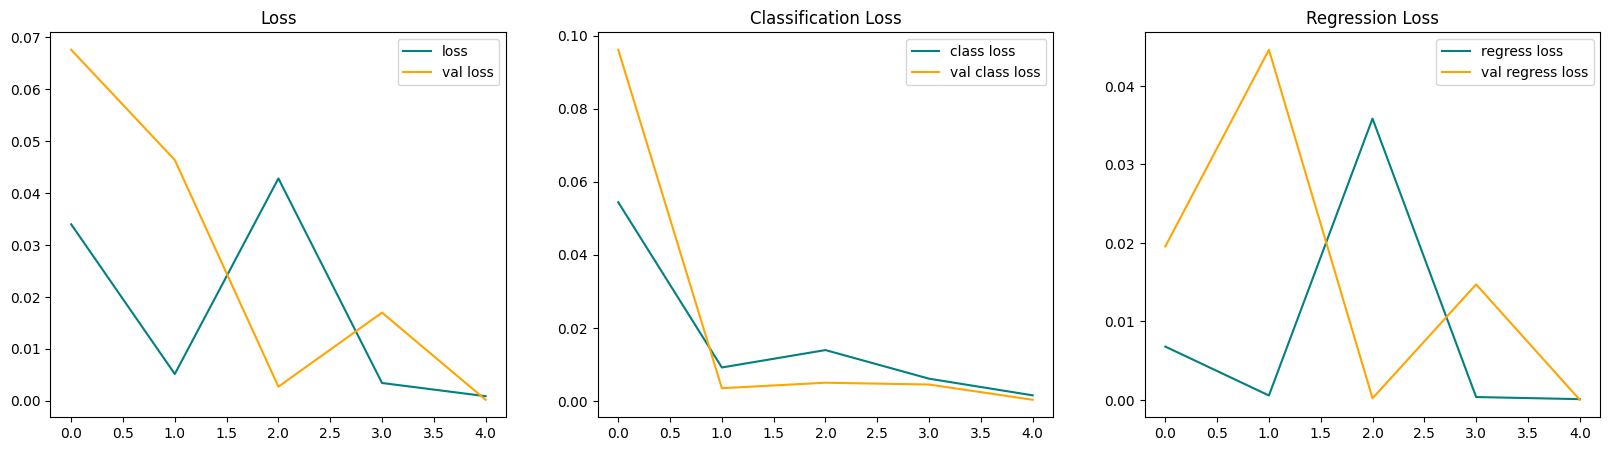

In [70]:
# plots out the total loss, validation total loss, classification loss, validation classification loss, regression loss and val regression loss
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [71]:
# sets up my iterator
test_data = test.as_numpy_iterator()

In [72]:
# grabs the next bacth of 8
test_sample = test_data.next()

In [73]:
# runs a prediction on the samples
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 20ms/step


In [1]:
# draws a figure with 4 plots for the samples and their predictions if the classification loss is greater than 0.9
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

NameError: name 'plt' is not defined

In [75]:
# imporst the load_model method so that I can go and save my model
from tensorflow.keras.models import load_model

In [76]:
#facetracker.save('facetracker4.h5')
tf.saved_model.save(facetracker, "")
#tf.saved_model.save(model, "model_directory")

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [2]:
# allows me to do real time detection using a webcam
# captures my video frame
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    # cuts it down to 450x450 which is our augmented size
    frame = frame[50:500, 50:500,:]
    # convert from BGR to RGB because opencv reads it in as BGR
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # resize it to 120x120
    resized = tf.image.resize(rgb, (120,120))
    # divide it by 255 to scale it down
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.98: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
       
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

In [16]:
cap = cv2.VideoCapture(1)